In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from biopsykit.classification.model_selection import SklearnPipelinePermuter

from pepbench.io import compute_abs_error

from pepbench.plotting.results import boxplot_algorithm_performance, _plot_helper_algorithm_performance

from fau_colors import cmaps, register_fausans_font

In [4]:
#register_fausans_font()
plt.close("all")

palette = sns.color_palette(cmaps.faculties)
sns.set_theme(context="notebook", style="ticks", font="sans-serif", palette=palette)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.sans-serif"] = "FAUSans Office"

palette

[(0.0, 0.1843137254901961, 0.4235294117647059),
 (0.4666666666666667, 0.6235294117647059, 0.7098039215686275),
 (1.0, 0.7215686274509804, 0.10980392156862745),
 (0.0, 0.6392156862745098, 0.8784313725490196),
 (0.2627450980392157, 0.6901960784313725, 0.16470588235294117),
 (0.7843137254901961, 0.06274509803921569, 0.1803921568627451)]

In [5]:
data_path = Path("../../../results/data/b-point")
model_path = Path("../../../results/models/b-point")
output_image_path = Path("Images/Paper")

In [7]:
data = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics.csv"), index_col=[0,1,2,3,4])
data

,,,,,arbol2017-isoelectric-crossings_error,arbol2017-isoelectric-crossings_rel_error,arbol2017-isoelectric-crossings_abs_error,arbol2017-isoelectric-crossings_abs_rel_error,arbol2017-second-derivative_error,arbol2017-second-derivative_rel_error,arbol2017-second-derivative_abs_error,arbol2017-second-derivative_abs_rel_error,arbol2017-third-derivative_error,arbol2017-third-derivative_rel_error,...,MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error,MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_rel_error,MinMax_KBest_SVR_RR-Interval-Median-Imputed_error,MinMax_KBest_SVR_RR-Interval-Median-Imputed_rel_error,MinMax_KBest_SVR_RR-Interval-Median-Imputed_abs_error,MinMax_KBest_SVR_RR-Interval-Median-Imputed_abs_rel_error,MinMax_KBest_KNR_RR-Interval-Median-Imputed_error,MinMax_KBest_KNR_RR-Interval-Median-Imputed_rel_error,MinMax_KBest_KNR_RR-Interval-Median-Imputed_abs_error,MinMax_KBest_KNR_RR-Interval-Median-Imputed_abs_rel_error
,participant,condition,phase,heartbeat_id_reference,,,,,,,,,,,,,,,,,,,,,
0,GDN0005,Dummy,HoldingBreath,0,-50.0,-0.128866,50.0,0.128866,-10.0,-0.025773,10.0,0.025773,-6.0,-0.015464,...,42.100062,0.108505,-27.641324,-0.071241,27.641324,0.071241,-21.831635,-0.056267,21.831635,0.056267
1,GDN0005,Dummy,HoldingBreath,1,64.0,0.158416,64.0,0.158416,54.0,0.133663,54.0,0.133663,160.0,0.396040,...,0.075808,0.000188,-2.989593,-0.007400,2.989593,0.007400,2.560997,0.006339,2.560997,0.006339
2,GDN0005,Dummy,HoldingBreath,3,-6.0,-0.015957,6.0,0.015957,80.0,0.212766,80.0,0.212766,-10.0,-0.026596,...,0.750411,0.001996,-2.787382,-0.007413,2.787382,0.007413,-0.395880,-0.001053,0.395880,0.001053
3,GDN0005,Dummy,HoldingBreath,4,-4.0,-0.010256,4.0,0.010256,46.0,0.117949,46.0,0.117949,-6.0,-0.015385,...,1.009984,0.002590,1.839797,0.004717,1.839797,0.004717,1.415401,0.003629,1.415401,0.003629
4,GDN0005,Dummy,HoldingBreath,5,-12.0,-0.031088,12.0,0.031088,74.0,0.191710,74.0,0.191710,-2.0,-0.005181,...,0.502580,0.001302,-1.381353,-0.003579,1.381353,0.003579,-0.718384,-0.001861,0.718384,0.001861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11606,VP_032,tsst,Talk,39,-25.0,-0.080645,25.0,0.080645,34.0,0.109677,34.0,0.109677,-14.0,-0.045161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11607,VP_032,tsst,Talk,40,-9.0,-0.027950,9.0,0.027950,24.0,0.074534,24.0,0.074534,-8.0,-0.024845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11608,VP_032,tsst,Talk,41,23.0,0.067647,23.0,0.067647,40.0,0.117647,40.0,0.117647,-8.0,-0.023529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
set(data.columns)

{'MinMax_KBest_DTR_RR-Interval-Median-Imputed_abs_error',
 'MinMax_KBest_DTR_RR-Interval-Median-Imputed_abs_rel_error',
 'MinMax_KBest_DTR_RR-Interval-Median-Imputed_error',
 'MinMax_KBest_DTR_RR-Interval-Median-Imputed_rel_error',
 'MinMax_KBest_DTR_RR-Interval_abs_error',
 'MinMax_KBest_DTR_RR-Interval_abs_rel_error',
 'MinMax_KBest_DTR_RR-Interval_error',
 'MinMax_KBest_DTR_RR-Interval_rel_error',
 'MinMax_KBest_DTR_Without-RR-Interval-Median-Imputed_abs_error',
 'MinMax_KBest_DTR_Without-RR-Interval-Median-Imputed_abs_rel_error',
 'MinMax_KBest_DTR_Without-RR-Interval-Median-Imputed_error',
 'MinMax_KBest_DTR_Without-RR-Interval-Median-Imputed_rel_error',
 'MinMax_KBest_DTR_Without-RR-Interval_abs_error',
 'MinMax_KBest_DTR_Without-RR-Interval_abs_rel_error',
 'MinMax_KBest_DTR_Without-RR-Interval_error',
 'MinMax_KBest_DTR_Without-RR-Interval_rel_error',
 'MinMax_KBest_KNR_RR-Interval-Median-Imputed_abs_error',
 'MinMax_KBest_KNR_RR-Interval-Median-Imputed_abs_rel_error',
 'MinMax

### Best performing ML-Estimators
- ('StandardScaler', 'SelectFromModel', 'SVR') Data: Include RR-Interval
- ('StandardScaler', 'SelectKBest', 'RandomForestRegressor') Data: Without RR-Interval
- ('StandardScaler', 'SelectFromModel', 'SVR') Data: Without RR-Interval

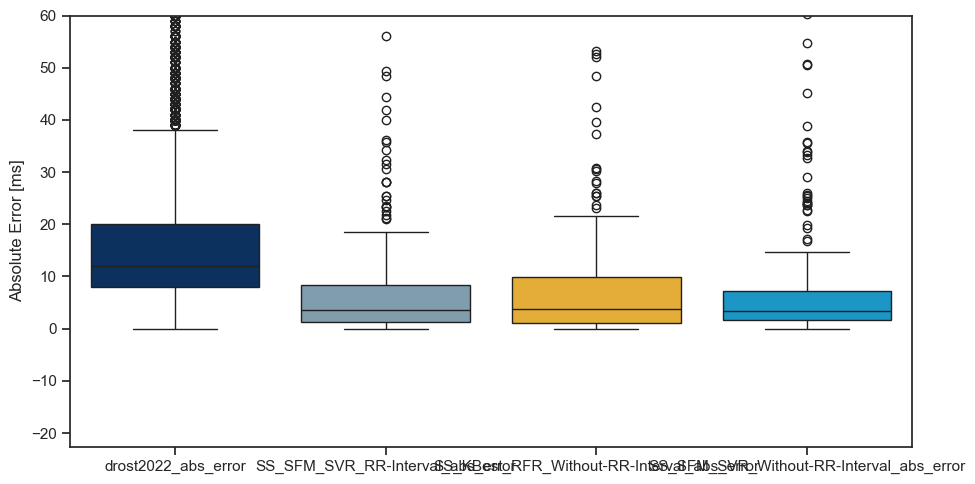

In [19]:
sns.boxplot(data[["drost2022_abs_error", "SS_SFM_SVR_RR-Interval_abs_error", "SS_KBest_RFR_Without-RR-Interval_abs_error", "SS_SFM_SVR_Without-RR-Interval_abs_error"]])
plt.ylabel("Absolute Error [ms]")
plt.ylim(top=60)
plt.tight_layout()

In [22]:
merged_ml_results_b_point = pd.read_csv(data_path.joinpath("merged_ml_results_b_point.csv"), index_col=[0,1,2,3,4])
merged_ml_results_b_point

,,,,,b_point_sample_reference,arbol2017-isoelectric-crossings,arbol2017-second-derivative,arbol2017-third-derivative,debski1993-second-derivative,drost2022,forounzafar2018,lozano2007-linear-regression,lozano2007-quadratic-regression,sherwood1990,...,SS_KBest_SVR_RR-Interval-Median-Imputed,SS_KBest_KNR_RR-Interval-Median-Imputed,MinMax_SFM_DTR_RR-Interval-Median-Imputed,MinMax_SFM_RFR_RR-Interval-Median-Imputed,MinMax_SFM_SVR_RR-Interval-Median-Imputed,MinMax_SFM_KNR_RR-Interval-Median-Imputed,MinMax_KBest_DTR_RR-Interval-Median-Imputed,MinMax_KBest_RFR_RR-Interval-Median-Imputed,MinMax_KBest_SVR_RR-Interval-Median-Imputed,MinMax_KBest_KNR_RR-Interval-Median-Imputed
,participant,condition,phase,heartbeat_id_reference,,,,,,,,,,,,,,,,,,,,,
0,GDN0005,Dummy,HoldingBreath,0,388.0,438.0,398.0,394.0,452.0,400.0,550.0,412.0,384.0,442.0,...,413.203634,413.774611,392.0,428.708351,416.847783,406.360637,390.0,430.100062,415.641324,409.831635
1,GDN0005,Dummy,HoldingBreath,1,404.0,340.0,350.0,244.0,388.0,420.0,402.0,404.0,384.0,330.0,...,403.604582,403.289314,406.0,402.310883,406.266686,402.384800,404.0,404.075808,406.989593,401.439003
2,GDN0005,Dummy,HoldingBreath,3,376.0,382.0,296.0,386.0,366.0,386.0,388.0,366.0,348.0,382.0,...,377.168561,376.234628,376.0,375.586275,377.910630,377.311871,376.0,375.249589,378.787382,376.395880
3,GDN0005,Dummy,HoldingBreath,4,390.0,394.0,344.0,396.0,376.0,396.0,398.0,372.0,348.0,394.0,...,388.452101,389.167183,388.0,388.687993,388.516479,386.688348,388.0,388.990016,388.160203,388.584599
4,GDN0005,Dummy,HoldingBreath,5,386.0,398.0,312.0,388.0,418.0,392.0,390.0,378.0,354.0,400.0,...,385.100028,390.464816,384.0,389.979887,386.655552,388.745641,386.0,385.497420,387.381353,386.718384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11606,VP_032,tsst,Talk,39,310.0,335.0,276.0,324.0,300.0,318.0,306.0,305.0,294.0,337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11607,VP_032,tsst,Talk,40,322.0,331.0,298.0,330.0,311.0,322.0,311.0,321.0,303.0,329.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11608,VP_032,tsst,Talk,41,340.0,317.0,300.0,348.0,330.0,343.0,309.0,332.0,322.0,311.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
merged_ml_results_b_point[merged_ml_results_b_point["SS_SFM_SVR_RR-Interval"].isna() == True]

,,,,,b_point_sample_reference,arbol2017-isoelectric-crossings,arbol2017-second-derivative,arbol2017-third-derivative,debski1993-second-derivative,drost2022,forounzafar2018,lozano2007-linear-regression,lozano2007-quadratic-regression,sherwood1990,...,SS_KBest_SVR_RR-Interval-Median-Imputed,SS_KBest_KNR_RR-Interval-Median-Imputed,MinMax_SFM_DTR_RR-Interval-Median-Imputed,MinMax_SFM_RFR_RR-Interval-Median-Imputed,MinMax_SFM_SVR_RR-Interval-Median-Imputed,MinMax_SFM_KNR_RR-Interval-Median-Imputed,MinMax_KBest_DTR_RR-Interval-Median-Imputed,MinMax_KBest_RFR_RR-Interval-Median-Imputed,MinMax_KBest_SVR_RR-Interval-Median-Imputed,MinMax_KBest_KNR_RR-Interval-Median-Imputed
,participant,condition,phase,heartbeat_id_reference,,,,,,,,,,,,,,,,,,,,,
182,GDN0005,Dummy,TiltDown,59,450.0,432.0,426.0,466.0,448.0,464.0,372.0,454.0,434.0,434.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,GDN0005,Dummy,TiltUp,0,372.0,404.0,344.0,430.0,412.0,386.0,252.0,394.0,382.0,406.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,GDN0005,Dummy,TiltUp,1,330.0,354.0,350.0,328.0,408.0,336.0,330.0,398.0,384.0,352.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,GDN0005,Dummy,TiltUp,2,404.0,376.0,370.0,416.0,402.0,414.0,416.0,396.0,380.0,384.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,GDN0005,Dummy,TiltUp,3,388.0,326.0,304.0,414.0,368.0,408.0,386.0,374.0,362.0,324.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11606,VP_032,tsst,Talk,39,310.0,335.0,276.0,324.0,300.0,318.0,306.0,305.0,294.0,337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11607,VP_032,tsst,Talk,40,322.0,331.0,298.0,330.0,311.0,322.0,311.0,321.0,303.0,329.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11608,VP_032,tsst,Talk,41,340.0,317.0,300.0,348.0,330.0,343.0,309.0,332.0,322.0,311.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


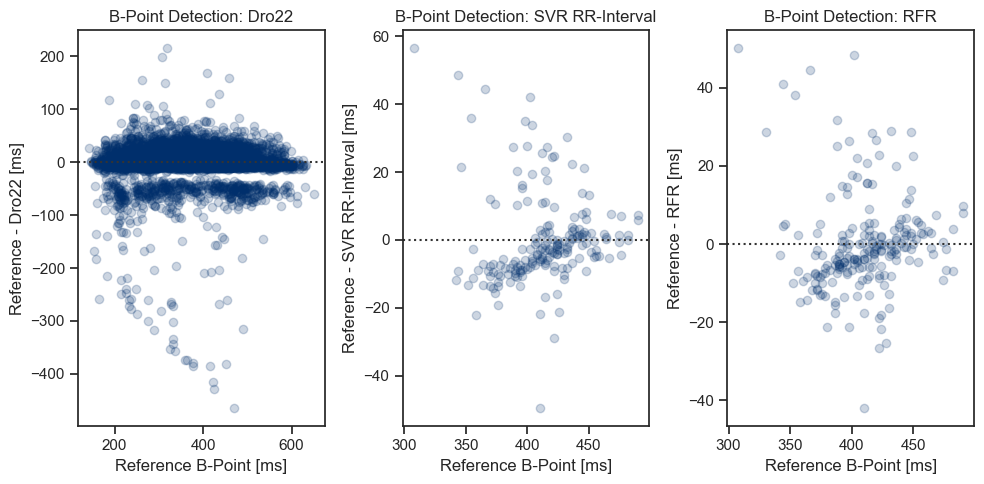

In [57]:
fig, axs = plt.subplots(1, 3)
sns.residplot(merged_ml_results_b_point, x="b_point_sample_reference", y="drost2022", ax=axs[0], scatter_kws={"alpha": 0.2})
axs[0].set_ylabel("Reference - Dro22 [ms]")
axs[0].set_xlabel("Reference B-Point [ms]")
axs[0].set_title("B-Point Detection: Dro22")
sns.residplot(merged_ml_results_b_point, x="b_point_sample_reference", y="SS_SFM_SVR_RR-Interval", ax=axs[1], scatter_kws={"alpha": 0.2})
axs[1].set_ylabel("Reference - SVR RR-Interval [ms]")
axs[1].set_xlabel("Reference B-Point [ms]")#
axs[1].set_title("B-Point Detection: SVR RR-Interval")
sns.residplot(merged_ml_results_b_point, x ="b_point_sample_reference", y="SS_KBest_RFR_Without-RR-Interval", ax=axs[2], scatter_kws={"alpha": 0.2})
axs[2].set_ylabel("Reference - RFR [ms]")
axs[2].set_xlabel("Reference B-Point [ms]")
axs[2].set_title("B-Point Detection: RFR")
fig.tight_layout()